In [22]:
import os
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import ipywidgets as widgets
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

#Open the data file and taking a look at it
Data = 'Data.xlsx'
pd.read_excel(Data).head(5)

,"Uddannelsesaktivitet efter status, bopælsområde, køn, uddannelse, alder og tid",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,Enhed: antal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
2,Fuldført,Hele landet,Mænd og kvinder i alt,H10 Grundskole,Alder i alt,93865.0,95634.0,94320.0,100198.0,100715.0,102939.0,105233.0,106509.0,104984.0,103470.0,102982.0,103751.0,100831.0,100202.0,101043.0
3,NaN,NaN,NaN,NaN,-5 år,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,8.0,29.0
4,NaN,NaN,NaN,NaN,6 år,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,20.0,81.0


In [2]:
#Removing the first two rows as they are useless.
df = pd.read_excel(Data, skiprows=2)


#Removing first 2 columns
drop_these = ['Unnamed: 0', 'Unnamed: 1']
df.drop(drop_these, axis=1, inplace=True) # axis = 1 -> columns, inplace=True -> changed, no copy made


In [3]:
#Renaming the columns
df.rename(columns = {'Unnamed: 2':'sex'}, inplace=True)
df.rename(columns = {'Unnamed: 3':'education'}, inplace=True)
df.rename(columns = {'Unnamed: 4':'age'}, inplace=True)

In [4]:
#Renaming years because having them as numbers can cause problems
#years = {}
#for i in range(2005,2019+1): # range from 2008 to but not including 2018
#    years[str(i)] = f'year{i}'
#df.rename(columns = years, inplace=True)


#find index of sex
total = df.loc[df["sex"]=="Mænd og kvinder i alt"].index
male = df.loc[df["sex"]=="Mænd"].index
female = df.loc[df["sex"]=="Kvinder"].index
#rename sec to total, male, and female
df["sex"][total] = "total"
df["sex"][male] = "male"
df["sex"][female] = "female"

In [5]:
#rename nan in sex to floats.
for i in range(0,len(df)):
    if type(df["sex"][i]) == str:
        x = df["sex"][i]
    else:
        df["sex"][i] = x

#rename nan in Education to floats
for i in range(0,len(df)):
    if type(df["education"][i]) == str:
        x = df["education"][i]
    else:
        df["education"][i] = x

In [6]:
df_long = pd.melt(df,id_vars=["sex","education","age"], var_name="year",value_name="uddannelsesaktivitet")

In [7]:
df_long

,sex,education,age,year,uddannelsesaktivitet
0,total,H10 Grundskole,Alder i alt,2005,93865.0
1,total,H10 Grundskole,-5 år,2005,0.0
2,total,H10 Grundskole,6 år,2005,0.0
3,total,H10 Grundskole,7 år,2005,0.0
4,total,H10 Grundskole,8 år,2005,0.0
...,...,...,...,...,...
18340,female,H80 Ph.d. og forskeruddannelser,38 år,2019,0.0
18341,female,H80 Ph.d. og forskeruddannelser,39 år,2019,0.0
18342,female,H80 Ph.d. og forskeruddannelser,40 år-,2019,0.0
18343,female,H80 Ph.d. og forskeruddannelser,NaN,2019,NaN


In [8]:
ALL = 'ALL'

def unique_sorted_values_plus_all(array):
    liste = array.values.tolist()
    unique = np.unique(liste)
    unique.sort()
    unique = unique.tolist()
    unique.insert(0,ALL)
    return unique

In [9]:
dropdown_year = widgets.Dropdown(options=unique_sorted_values_plus_all(df_long.year))
dropdown_age = widgets.Dropdown(options=unique_sorted_values_plus_all(df_long.age))

output = widgets.Output()

def dropdown_year_eventhandler(change):
    output.clear_output()
    with output:
        if (change.new == ALL):
            display(df_long)
        else:
            display(df_long[df_long.year == change.new])
            
dropdown_year.observe(dropdown_year_eventhandler, names='value')

display(dropdown_year)

Dropdown(options=('ALL', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015…

In [10]:
display(output)

Output()

In [11]:
dropdown_year = widgets.Dropdown(options=unique_sorted_values_plus_all(df_long.year))
dropdown_age = widgets.Dropdown(options=unique_sorted_values_plus_all(df_long.age))
dropdown_sex = widgets.Dropdown(options=unique_sorted_values_plus_all(df_long.sex))
dropdown_education = widgets.Dropdown(options=unique_sorted_values_plus_all(df_long.education))

output = widgets.Output()

def filters(year, age, sex, education):
    output.clear_output()
    
    if (year == ALL) & (age == ALL) & (sex == ALL) & (education == ALL):
        filters = df_long
    elif (year == ALL) & (year == ALL): # everything but age
        filters = df_long[df_long.age == age]
    elif (age == ALL):
        filters = df_long[df_long.year == year]
    elif (sex == ALL):
        filters = df_long[df_long.year == year]
    elif (age == ALL):
        filters = df_long[df_long.year == year]
    else:
        filters = df_long[(df_long.year == year) & (df_long.age == age)]
    
    with output:
        display(filters)


In [39]:
dropdown_year = widgets.Dropdown(options=unique_sorted_values_plus_all(df_long.year))
dropdown_age = widgets.Dropdown(options=unique_sorted_values_plus_all(df_long.age))
dropdown_sex = widgets.Dropdown(options=unique_sorted_values_plus_all(df_long.sex))
dropdown_education = widgets.Dropdown(options=unique_sorted_values_plus_all(df_long.education))

output = widgets.Output()
plot_output = widgets.Output()

def filters(year, age, sex, education):
    output.clear_output()
    plot_output.clear_output()
    
    if (year == ALL) & (age == ALL) & (sex == ALL) & (education == ALL): # everything
        filters = df_long
    elif (age == ALL) & (sex == ALL) & (education == ALL) : # everything but year
        filters = df_long[df_long.year == year]
    elif (year == ALL) & (sex == ALL) & (education == ALL): # everything but age
        filters = df_long[df_long.age == age]
    elif (age == ALL) & (year == ALL) & (education == ALL): # everything but sex
        filters = df_long[df_long.sex == sex]
    elif (age == ALL) & (year == ALL) & (sex == ALL): # everything but education
        filters = df_long[df_long.education == education]
    elif (sex == ALL) & (education == ALL): # everything but year, age
        filters = df_long[(df_long.year == year) & (df_long.age == age)]
    elif (age == ALL) & (education == ALL): # everything but year, sex
        filters = df_long[(df_long.year == year) & (df_long.sex == sex)]
    elif (age == ALL) & (sex == ALL): # everything but year, education
        filters = df_long[(df_long.year == year) & (df_long.education == education)]
    elif (year == ALL) & (education == ALL): # everything but age sex
        filters = df_long[(df_long.age == age) & (df_long.sex == sex)]
    elif (year == ALL) & (sex == ALL): # everything but age education
        filters = df_long[(df_long.age == age) & (df_long.education == education)]
    elif (year == ALL) & (age == ALL): # everything but sex education
        filters = df_long[(df_long.sex == sex) & (df_long.education == education)]
    elif (year == ALL): # everything but age sex education
        filters = df_long[(df_long.age == age) & (df_long.sex == sex) & (df_long.education == education)]
    elif (age == ALL): # everything but year sex education
        filters = df_long[(df_long.year == year) & (df_long.sex == sex) & (df_long.education == education)]
    elif (sex == ALL): # everything but year age education
        filters = df_long[(df_long.year == year) & (df_long.age == age) & (df_long.education == education)]
    elif (education == ALL): # everything but year age sex
        filters = df_long[(df_long.year == year) & (df_long.age == age) & (df_long.sex == sex)]
    else:
        filters = df_long[(df_long.year == year) & (df_long.age == age) & (df_long.sex == sex) & (df_long.education == education)]
    
    with output:
        display(filters)
    with plot_output:
        sns.kdeplot(filters['uddannelsesaktivitet'], shade=True)
        plt.show()


In [40]:
def dropdown_year_eventhandler(change):
    filters(change.new, dropdown_age.value, dropdown_sex.value, dropdown_education.value)
def dropdown_age_eventhandler(change):
    filters(dropdown_year.value, change.new, dropdown_sex.value, dropdown_education.value)
def dropdown_sex_eventhandler(change):
    filters(dropdown_year.value, dropdown_age.value, change.new, dropdown_education.value)
def dropdown_education_eventhandler(change):
    filters(dropdown_year.value, dropdown_age.value, dropdown_sex.value, change.new)

In [41]:
dropdown_year.observe(
dropdown_year_eventhandler, names='value')
dropdown_age.observe(
dropdown_age_eventhandler, names='value')
dropdown_sex.observe(
dropdown_sex_eventhandler, names='value')
dropdown_education.observe(
dropdown_education_eventhandler, names='value')

In [42]:
display(dropdown_year)
display(dropdown_age)
display(dropdown_sex)
display(dropdown_education)

Dropdown(options=('ALL', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015…

Dropdown(options=('ALL', '-5 år', '10 år', '11 år', '12 år', '13 år', '14 år', '15 år', '16 år', '17 år', '18 …

Dropdown(options=('ALL', 'female', 'male', 'total'), value='ALL')

Dropdown(options=('ALL', 'H10 Grundskole', 'H15 Forberedende uddannelser', 'H20 Gymnasiale uddannelser', 'H29 …

In [43]:
display(output)
display(plot_output)

Output()

Output()

In [23]:
#adding a graph
plot_output = widgets.Output()


def filters(year, age, sex, education):
    output.clear_output()
    plot_output.clear_output()
    
    if (year == ALL) & (age == ALL) & (sex == ALL) & (education == ALL): # everything
        filters = df_long
    elif (age == ALL) & (sex == ALL) & (education == ALL) : # everything but year
        filters = df_long[df_long.year == year]
    elif (year == ALL) & (sex == ALL) & (education == ALL): # everything but age
        filters = df_long[df_long.age == age]
    elif (age == ALL) & (year == ALL) & (education == ALL): # everything but sex
        filters = df_long[df_long.sex == sex]
    elif (age == ALL) & (year == ALL) & (sex == ALL): # everything but education
        filters = df_long[df_long.education == education]
    elif (sex == ALL) & (education == ALL): # everything but year, age
        filters = df_long[(df_long.year == year) & (df_long.age == age)]
    elif (age == ALL) & (education == ALL): # everything but year, sex
        filters = df_long[(df_long.year == year) & (df_long.sex == sex)]
    elif (age == ALL) & (sex == ALL): # everything but year, education
        filters = df_long[(df_long.year == year) & (df_long.education == education)]
    elif (year == ALL) & (sex == education): # everything but age sex
        filters = df_long[(df_long.age == age) & (df_long.sex == sex)]
    elif (year == ALL) & (sex == ALL): # everything but age education
        filters = df_long[(df_long.age == year) & (df_long.education == education)]
    elif (year == ALL) & (age == ALL): # everything but sex education
        filters = df_long[(df_long.sex == sex) & (df_long.education == education)]
    elif (year == ALL): # everything but age sex education
        filters = df_long[(df_long.age == age) & (df_long.sex == sex) & (df_long.education == education)]
    elif (age == ALL): # everything but year sex education
        filters = df_long[(df_long.year == year) & (df_long.sex == sex) & (df_long.education == education)]
    elif (sex == ALL): # everything but year age education
        filters = df_long[(df_long.year == year) & (df_long.age == age) & (df_long.education == education)]
    elif (education == ALL): # everything but year age sex
        filters = df_long[(df_long.year == year) & (df_long.age == age) & (df_long.sex == sex)]
    else:
        filters = df_long[(df_long.year == year) & (df_long.age == age) & (df_long.sex == sex) & (df_long.education == education)]
    
    with plot_output:
        sns.kdeplot(filters['uddannelsesaktivitet'], shade=True)
        plt.show()

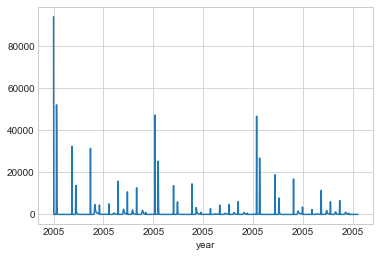

In [17]:
df_long.loc[df_long['year'] == '2005', :].plot(x='year',y='uddannelsesaktivitet',legend=False);

In [18]:
def plot_e(df, sex, education, age): 
    I = df['sex'] == sex
    ax=df.loc[I,:].plot(x='year', y='uddannelsesaktivitet', style='-o', legend=False)

In [19]:
widgets.interact(plot_e, 
    df = widgets.fixed(df_long),
    sex = widgets.Dropdown(description='sex', 
                                    options=df_long.sex.unique(), 
                                    value='female'),
    education = widgets.Dropdown(description='education', options=df_long.education.unique(), value='H10 Grundskole'),
    age = widgets.Dropdown(description='age', options=df_long.age.unique(), value='10 år')
); 

interactive(children=(Dropdown(description='sex', index=2, options=('total', 'male', 'female'), value='female'…

In [20]:
Education = widgets.Dropdown(description='education', options=df_long.education.unique(), value='H10 Grundskole')